# Основы машинного обучения

# Содержание:
1. [Описание проекта](#step1)
2. [Шаг 1. Загрузка данных и изучение общей информации](#step2)
3. [Шаг 2. Проведение исследовательского анализа данных (EDA)](#step3)
4. [Шаг 3. Построение модели прогнозирования оттока клиентов](#step4)
5. [Шаг 4. Кластеризация клиентов](#step5)
6. [Шаг 5. Формулирование выводов и базовые рекомендации по работе с клиентами](#step6)

# Описание проекта:<a id="step1"></a>   
</div>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов. 

# План действий:
1. Импортируем библиотеки, загрузим файлы данных, изучим их;
2. Проведем исследовательский анализ данных: посмотрим, есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения, построим столючатые гистограммы, матрицу корреляций;
3. Построим модель бинарной классификации клиентов: разобьем данные на обучающую и валидационную выборки, обучим модель двумя способами, оценим метрики и сравним по ним модели;
4. Сделаем кластеризацию клиентов: стандартизируем данные, построим матрицу расстояний, нарисуй дендрограмму, обучим модель кластеризации, посмотрим на средние значения признаков для кластеров, построим распределение признаков для кластеров, посчитаем долю оттока;
5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.

# Шаг 1. Загрузка данных и изучение общей информации:<a id="step2"></a>   
</div>

In [1]:
# Импортируем библиотеки
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

In [2]:
# Сохраним файл в переменную
df = pd.read_csv('D:/Project/11/gym_churn.csv', sep=',')

In [3]:
# Посмотрим на размер
df.shape

(4000, 14)

In [4]:
# Выведем первые 5 строк
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
# Посмотрим общую информацию о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### «Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

* Данные клиента за предыдущий до проверки факта оттока месяц:

`gender` — пол;

`Near_Location` — проживание или работа в районе, где находится фитнес-центр;

`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

`Phone` — наличие контактного телефона;

`Age` — возраст;

`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

`Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);

`Group_visits` — факт посещения групповых занятий;

`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;

`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;

`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;

`Churn` — факт оттока в текущем месяце.

Как мы видим, в нашем датасете 14 колонок и 4000 значений. 

In [6]:
# Приведем название колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# Столбец `month_to_end_contract` приведем к целочисленному типу
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [8]:
# Проверим на пропущенные значения
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
# Проверим на дубликаты
df.duplicated().sum()

0

Название колонок приведено к нижнему регистру, пропущенных значений нет, дубликатов нет. Таблица готова к работе

# Шаг 2. Проведение исследовательского анализа данных (EDA):<a id="step3"></a>   
</div>

### Еще раз посмотрим на датасет:

In [10]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


##### Посмотрим, есть ли отсутствующие признаки:

In [11]:
# Проверим на пропущенные значения
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

##### Изучим средние значения и стандартные отклонения методом `describe()`:

In [12]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Промежуточные выводы:
1. В нашем датасете мужчины и женщины представлены примерно равномерно;
2. В фитнес-клуб в основном ходят те, кто проживает в районе нахождения фитнес-клуба;
3. Почти половина посетителей - сотрудники компании-партнера клуба;
4. Мало кто использовал промо-код от знакомого при оплате абонемента;
5. Почти все посетители в анкете указали номер телефона;
6. Длительность контракта от 1 до 12 месяцев;
7. Меньше половины посетителей ходят на групповые занятия;
8. В фитнес-клуб ходят посетители от 18 до 41 года, средний возраст 29 лет;
9. Люди также пользуются другими услугами финтес-центра: есть посетитель, который оставил почти полмиллиона рублей;
10. Срок окончания действующего абонемента от 1 до 12 месяцев;
11. Есть посетитель, который ходит в фитнес-клуб уже 31 месяц, но в среднем время составляет 3 месяца;
12. В среднем посетители ходят в клуб 2 раза в неделю за все время начала действия абонемента. Но есть, кто посещает 6 раз;
13. В предыдущем месяце посетители также посещали клуб примерно 2 раза в месяц;
14. К сожалению, отток посетителей большой

##### Посмотрим на средние значения в двух группах - тех, кто ушел в отток и тех, кто остался

In [13]:
# Воспользуемся методом `groupby()`
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Возьмем за обозначение:
`churn`: 0 - остался, 1 - ушел

#### Промежуточные выводы:
1. Остаются те клиенты, кто живет в районе фитнес-клуба и у кого абонемент на длительный срок. Средний возраст такого клиента примерно 30 лет, он приносит бОльший доход, чем те, кто уходит (что логично). В среднем такие клиенты держатся около 4 месяцев, посещают занятия 2 раза в неделю. Половина из них - сотрудники компании-партнера клуба.
2. Уходят в основном те, кто брал абонемент на небольшой срок (1-2 месяца). Они ходят в клую 1 раз в неделю

##### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался

Признаки бывают числовые и категориальные. Выделим числовые и категориальные столбцы:

In [14]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Числовые столбцы : `contract_period`, `age`, `avg_additional_charges_total`, `month_to_end_contract`, `lifetime`,   `avg_class_frequency_total`, `avg_class_frequency_current_month`

Категориальные столбцы: `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`]

###### Гистограммы для числовых столбцов:

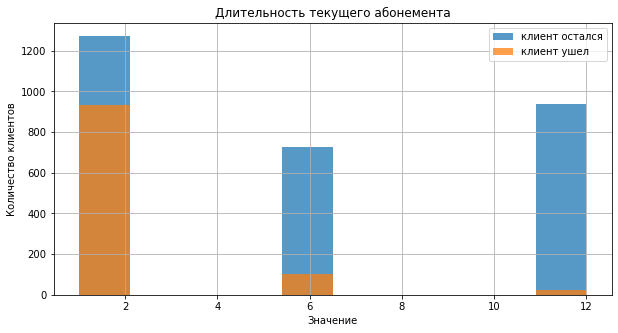

In [15]:
# Гистограмма для длительности текущего абонемента тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['contract_period'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Длительность текущего абонемента')
plt.grid(True)
plt.show()

Судя по графику, чаще всего уходят клиенты, которые посещали тренировки 1 месяц

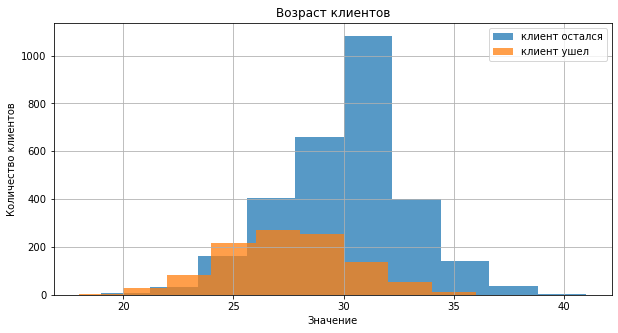

In [16]:
# Гистограмма для возраста тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['age'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Возраст клиентов')
plt.grid(True)
plt.show()

В основном уходят люди в возрасте 25-30 лет. Чаще остаются клиенты в возрасте 30-35 лет

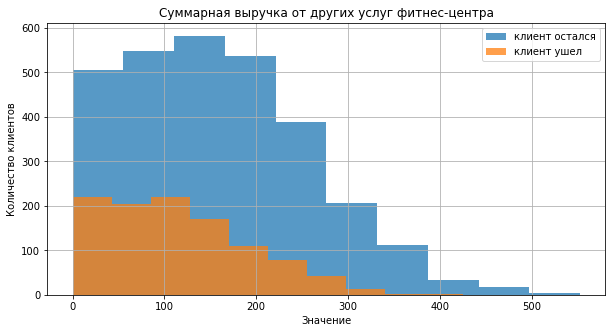

In [17]:
# Гистограмма суммарной выручки от других услуг фитнес-центра тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['avg_additional_charges_total'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Суммарная выручка от других услуг фитнес-центра')
plt.grid(True)
plt.show()

Постоянные клиенты приносят выручки до 200 000. Их гораздо больше, чем тех, кто ушел. Хотя суммы примерно сопоставимы, "постоянщики" берут количеством

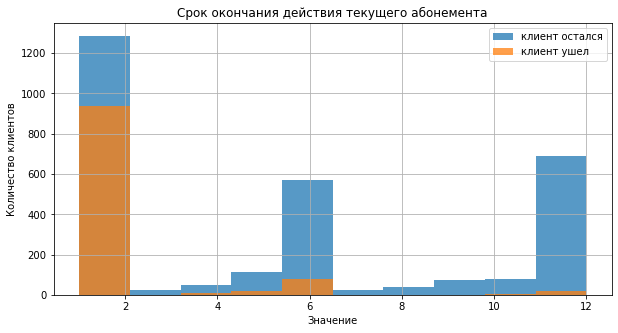

In [18]:
# Гистограмма срока окончания действия текущего абонемента тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['month_to_end_contract'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Срок окончания действия текущего абонемента')
plt.grid(True)
plt.show()

Те, кто уходит - имеют краткосрочный абонемент на 1 месяц. Клиенты-"постоянщики" покупают в основном абонемент на 1,6 и 12 месяцев

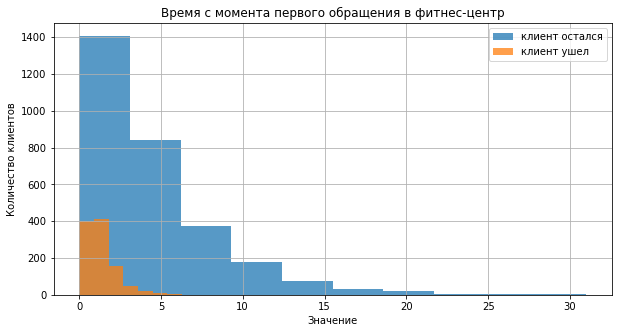

In [19]:
# Гистограмма времени с момента первого обращения в фитнес-центр тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['lifetime'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Время с момента первого обращения в фитнес-центр')
plt.grid(True)
plt.show()

Видно, что те, кто ушел - максимум были в фитнес-клубе 5 месяцев, в основном 1-2. Но есть люди, кто занимается уже более 30 месяцев. Хотя основная масса клиентов в фитнес-клубе до 5 месяцев с момента обращения

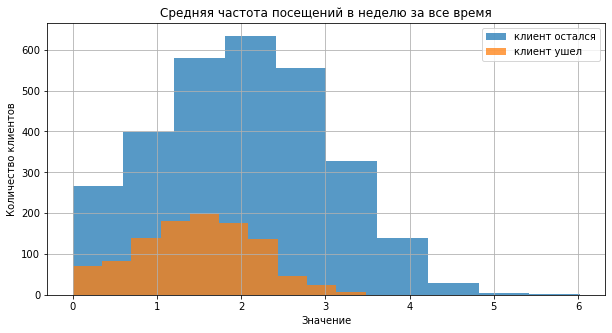

In [20]:
# Гистограмма средней частоты посещений в неделю за все время тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['avg_class_frequency_total'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Средняя частота посещений в неделю за все время')
plt.grid(True)
plt.show()

1-3 раза в неделю ходили на тренировки те, кто остался и 1-2 раза ходили те, кто ушел

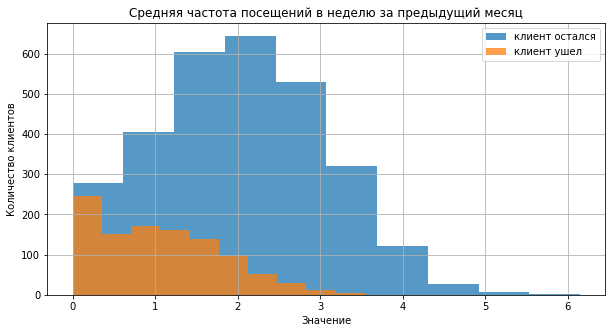

In [21]:
# Гистограмма средней частоты посещений в неделю за предыдущий месяц тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['avg_class_frequency_current_month'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Средняя частота посещений в неделю за предыдущий месяц')
plt.grid(True)
plt.show()

В предыдущем месяце клиенты, кто остался - ходили в основном 1-3 раза в неделю. Кто ушел - либо не ходили совсем, либо ходили до двух раз

###### Гистограммы для категориальных столбцов:

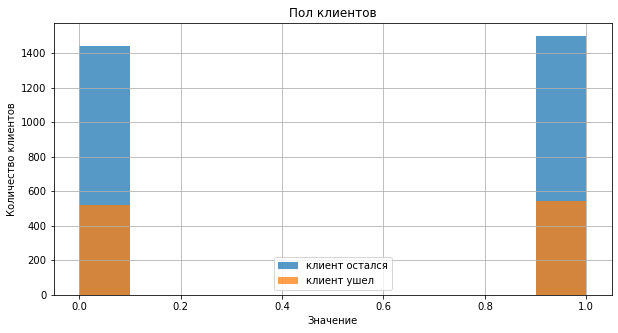

In [22]:
# Гистограмма половой принадлежности клиентов тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['gender'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Пол клиентов')
plt.grid(True)
plt.show()

Клиентов обоих полов примерно одинаково как среди тех, кто ушел, так и среди тех, кто остался

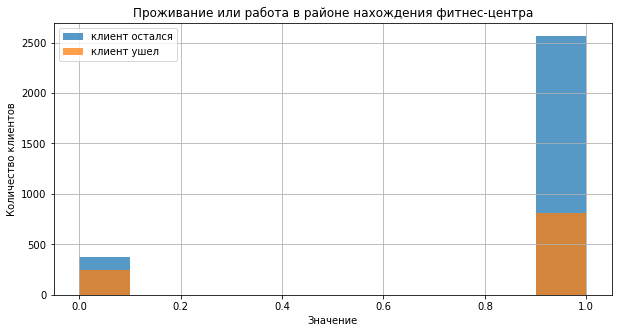

In [23]:
# Гистограмма проживания или работы в районе нахождения фитнес-центра тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['near_location'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Проживание или работа в районе нахождения фитнес-центра')
plt.grid(True)
plt.show()

Как мы видим, большинство посетителей проживают или работают в районе нахождения фитнес-клуба

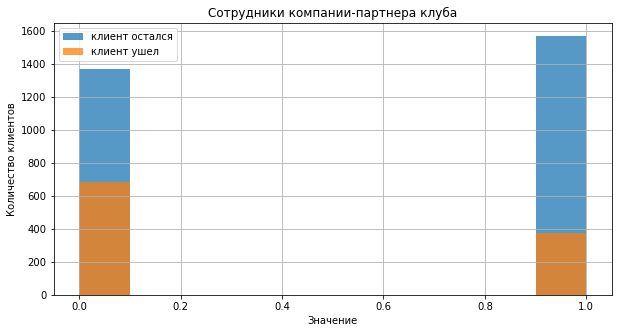

In [24]:
# Гистограмма сотрудники компании-партнера клуба тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['partner'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Сотрудники компании-партнера клуба')
plt.grid(True)
plt.show()

Чуть больше тех, кто является сотрудниками компании-партнера клуба.

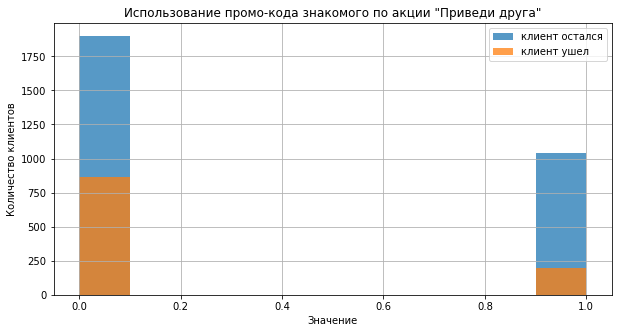

In [25]:
# Гистограмма промо-кода тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['promo_friends'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Использование промо-кода знакомого по акции "Приведи друга"')
plt.grid(True)
plt.show()

В основном люди приходят самостоятельно, без промо-кодов

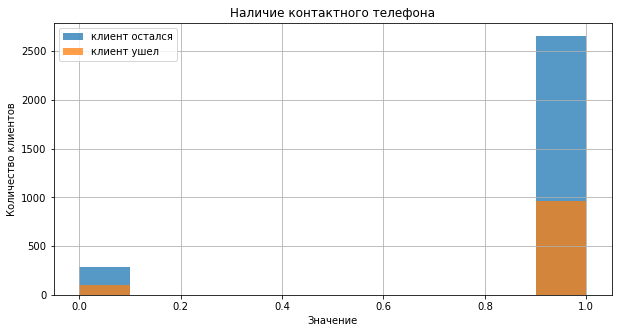

In [26]:
# Гистограмма телефона тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['phone'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Наличие контактного телефона')
plt.grid(True)
plt.show()

Все логично, люди оставляют телефон, когда записываются в клуб. Примерно 300 человек не хотят сообщать номер

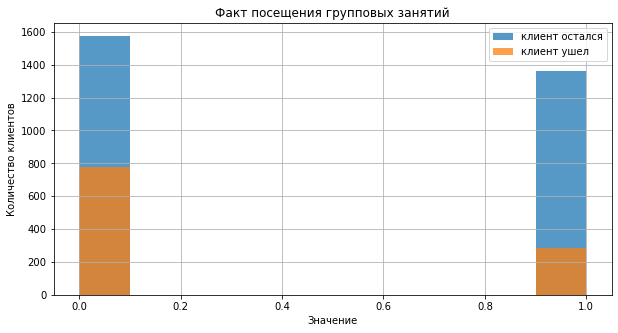

In [27]:
# Гистограмма факта посещения групповых занятий тех, кто ушел и тех, кто остался
plt.figure(figsize=(10,5))
df.groupby('churn')['group_visits'].hist(alpha=0.75)
plt.legend(['клиент остался', 'клиент ушел'])
plt.xlabel('Значение')
plt.ylabel('Количество клиентов')
plt.title('Факт посещения групповых занятий')
plt.grid(True)
plt.show()

Постоянные клиенты предпочитают групповые занятия.

##### Построим матрицу корреляций и отобразим ее

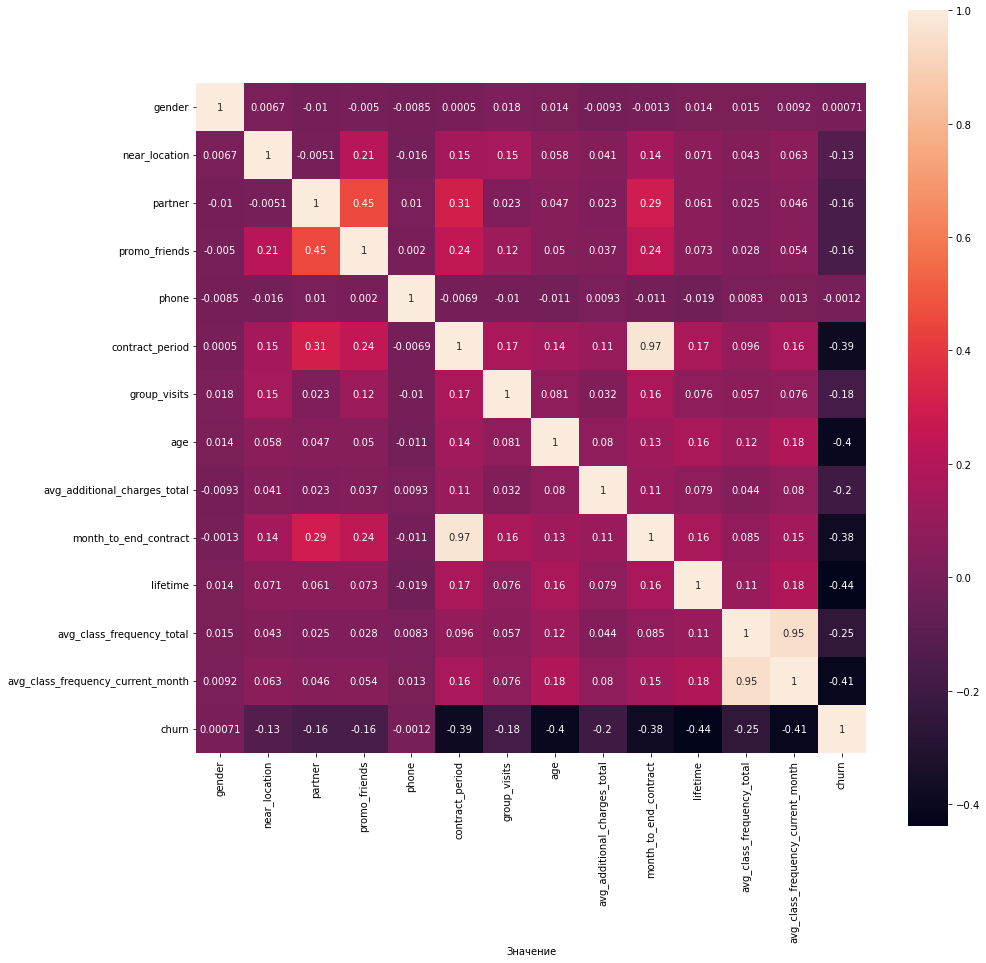

In [28]:
# Строим матрицу корреляций методом `corr()` и отобразим ее
cm = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
#нарисуем тепловую карту 
sns.heatmap(cm, annot=True, square=True) 
plt.xlabel('Значение')
plt.show()

По нашей тепловой карте видно, что некоторые признаки сильно коррелируют между собой. Например, "Срок до окончания действующего абонемента" и "Длительность текущего контракта"; "Средняя частота посещений в неделю" и "Средняя частота посещений в месяц". 

# Шаг 3. Построение модели прогнозирования оттока клиентов:<a id="step4"></a>   
</div>

Построим модель бинарной классификации клиентов, где за целевой признак возьмем факт оттока клиента в следующем месяце.

##### Разобьем данные на обучающую и валидационную выборку функцией `train_test_split()`

In [29]:
# Разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['churn'], axis=1) 
y = df['churn'] 

In [30]:
# Разделяем модель на обучающую и валидационную выборки в пропорциях 80 на 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) 

In [31]:
# Создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler() 
# Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
# Применим стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [32]:
# Выведем 3 элемента матрицы со стандартизированными значениями
X_train_st[:3]

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.59173796,
         1.12734972,  1.75580418,  1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378, -0.79568246,
         5.88138322, -0.2239674 , -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  1.83048   ,
         0.3350108 , -0.84308456, -0.80541199]])

In [33]:
# Выведем 3 элемента матрицы со стандартизированными значениями
X_test_st[:3]

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986,  1.17967339, -0.03852687,  1.165334  ,  1.83048   ,
        -0.45732812,  0.47975683,  0.52923355],
       [-1.01511421, -2.39517058, -0.96922337, -0.67567125,  0.31628211,
        -0.81299073,  1.17967339, -0.65650171, -1.01953791, -0.79568246,
        -0.98555406, -0.9016214 , -0.98091361],
       [-1.01511421, -2.39517058,  1.03175391, -0.67567125,  0.31628211,
         0.28610954, -0.84769226,  0.27046055, -1.26091493,  0.15928571,
        -0.45732812, -1.93212561, -1.6705354 ]])

##### Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом

Обучение логистической регрессией:

In [34]:
# Зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver='liblinear', random_state=0)
# Обучим модель
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Обучение случайным лесом:

In [35]:
# Зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
# Обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

##### Оценим метрики `accuracy` , `precision` и `recall` для обеих моделей на валидационной выбоке

Оценим метрики для логистической регрессии:

In [36]:
predictions = lr_model.predict(X_test_st)
print('Accuracy (Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision (Точность): {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall (Полнота): {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy (Доля правильных ответов): 0.92
Precision (Точность): 0.85
Recall (Полнота): 0.83


Оценим метрики для случайного леса:

In [37]:
predictions = rf_model.predict(X_test_st)
print('Accuracy (Доля правильных ответов): {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision (Точность): {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall (Полнота): {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy (Доля правильных ответов): 0.92
Precision (Точность): 0.84
Recall (Полнота): 0.81


##### Сравним по метрикам модели и сделаем вывод, какая показала себя лучше

При сравнении метрик видно, что "Доля правильных ответов" (Accuracy) у обеих метрик составляет 92%, что довольно высоко. Но если сравнивать "Точность" (Precision) и "Полноту" (Recall), то видно, что у метрики логистической регрессии результат выше

# Шаг 4. Кластеризация клиентов:<a id="step5"></a>   
</div>

Проведем кластеризацию клиентов

##### Стандартизируем данные

In [38]:
# Cоздаём объект класса scaler (нормализатор)
scaler = StandardScaler()

# Обучаем нормализатор и преобразуем набор данных 
x_sc = scaler.fit_transform(df)

# Выведем 3 элемента матрицы со стандартизированными значениями
x_sc[:3]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198, -0.6008387 ],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 , -0.6008387 ],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851, -0.6008387 ]])

##### Построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму

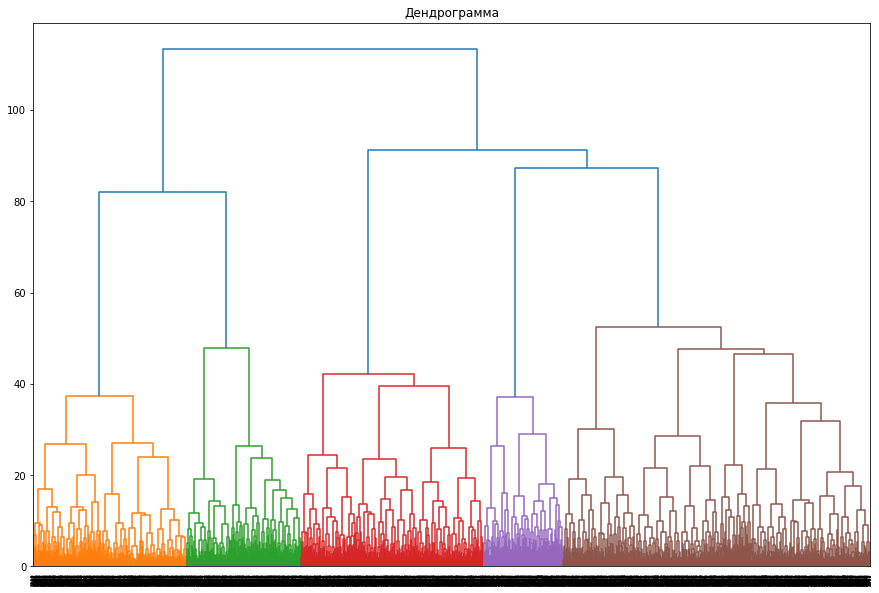

In [39]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show() 

Согласно дендрограмме, нам предложено оптимальное число кластеров для выделения в количестве 5 штук

##### Обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов

In [40]:
# Задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 

# Прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc) 

##### Посмотрим на средние значения признаков для кластеров

In [41]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


Как мы помним, принцип работы алгоритма `K-Means` в том, что он пошагово подбирает центры объектов и относит объекты к тому кластеру, чей центр ближе. Можно заметить:
* В кластер 1 [По индексу 0] попали клиенты, которые не живут в районе нахождения фитнес-клуба, не ходят на групповые занятия и длительность текущего абонемента составляет не более двух месяцев;
* В кластер 2 попали клиенты с длительным сроком действующего абонемента, приносящих большУю суммарную выручку, которые часто ходят и имеют действующий абонемент;
* В кластер 3 попали клиенты, которые точно живут в районе фитнес-клуба, самые молодые, приносящие наименьшую прибыль, которые в большинстве к сожалению уже покинули клуб;
* В кластер 4 попали клиенты - не сотрудники компаний-партнеров, самые возрастные, но продолжающие оставаться в фитнес-клубе;
* В кластер 5 попали клиенты - в основном сотруднкик компаний-партнеров, с длительными абонементами, приносящие наибОльшую суммарную выручку 

##### Построим распределения признаков для кластеров

In [42]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn', 'cluster_km'],
      dtype='object')

Числовые столбцы : contract_period, age, avg_additional_charges_total, month_to_end_contract, lifetime, avg_class_frequency_total, avg_class_frequency_current_month

Категориальные столбцы: gender, near_location, partner, promo_friends, phone, group_visits

In [43]:
# Выделим числовые слолбцы
df_number = [
    'contract_period', 
    'age', 
    'avg_additional_charges_total',
    'month_to_end_contract', 
    'lifetime', 
    'avg_class_frequency_total', 
    'avg_class_frequency_current_month'
]

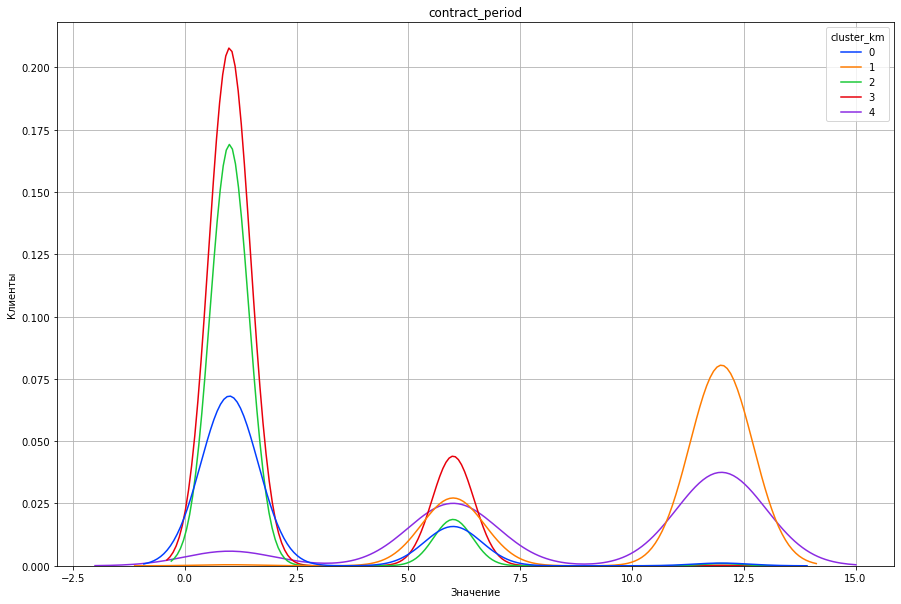

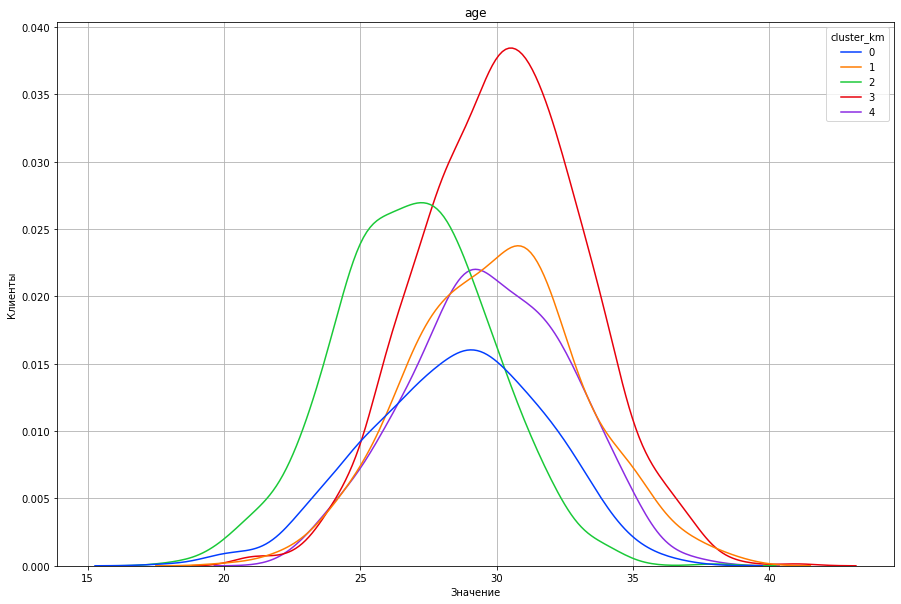

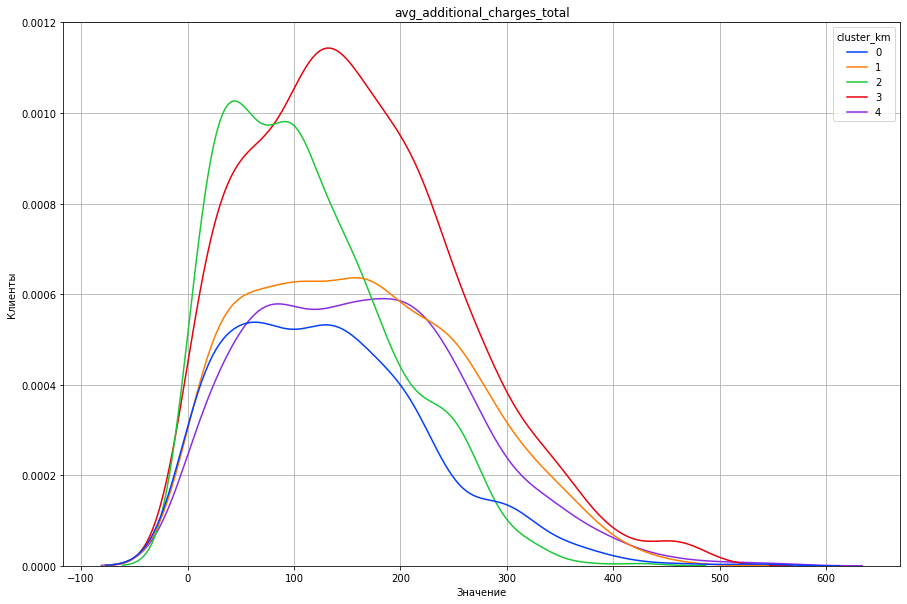

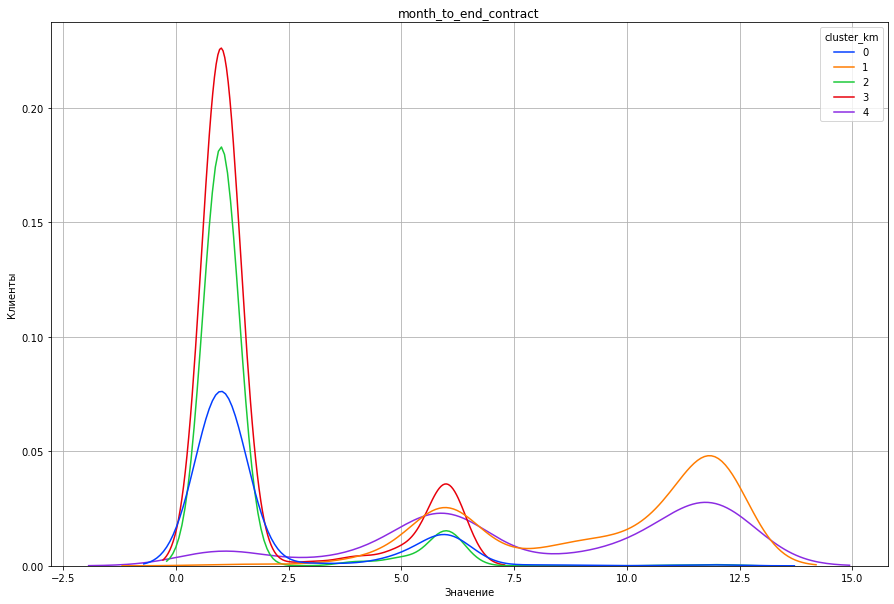

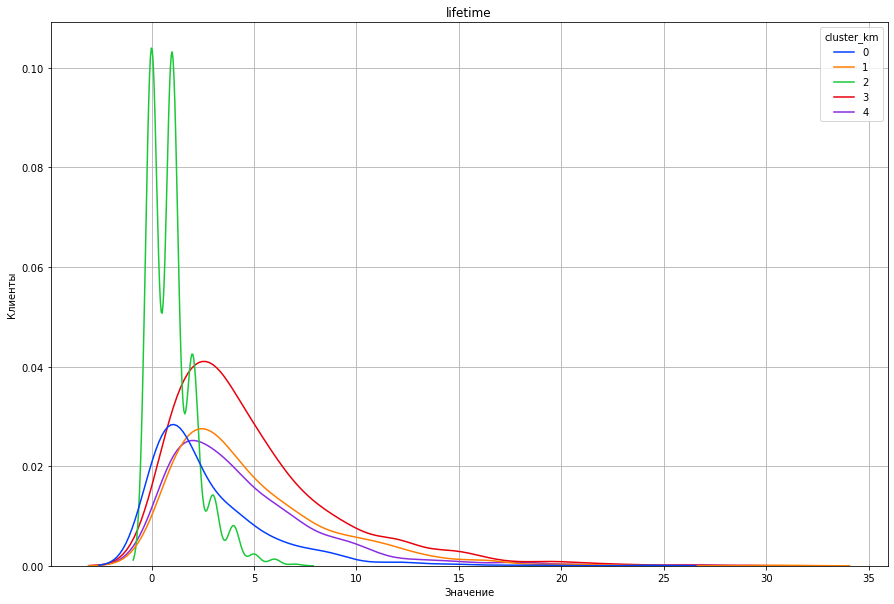

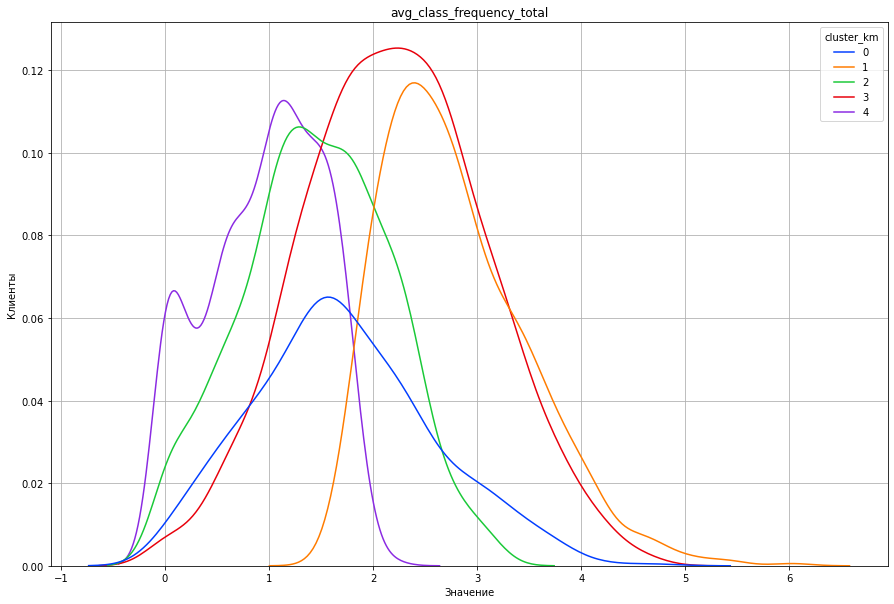

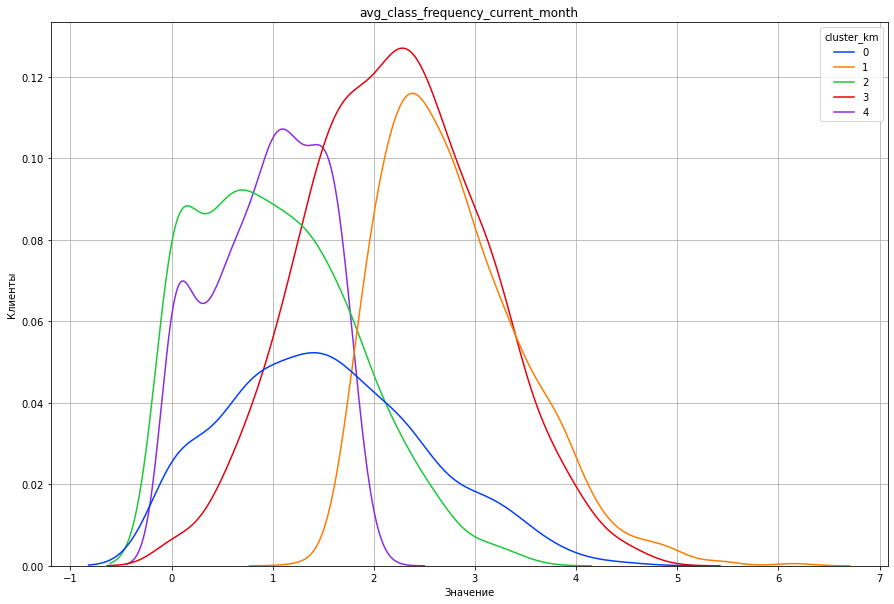

In [44]:
# Чтобы упростить работу, пройдемся циклом по числовым столбцам и построим график 
for column in df_number:
    plt.figure(figsize=(15, 10))
    sns.kdeplot(data=df, x=column, hue='cluster_km', legend='cluster_km', palette='bright')
    plt.title(column)
    plt.ylabel('Клиенты')
    plt.xlabel('Значение')
    plt.grid(True)
    plt.show()

Построив график распределения признаков, можно согласиться в выводами, которые сделали выше

In [45]:
# Выделим категориальные столбцы
df_category = [
    'gender', 
    'near_location', 
    'partner', 
    'promo_friends', 
    'phone', 
    'group_visits'
]

<Figure size 1080x720 with 0 Axes>

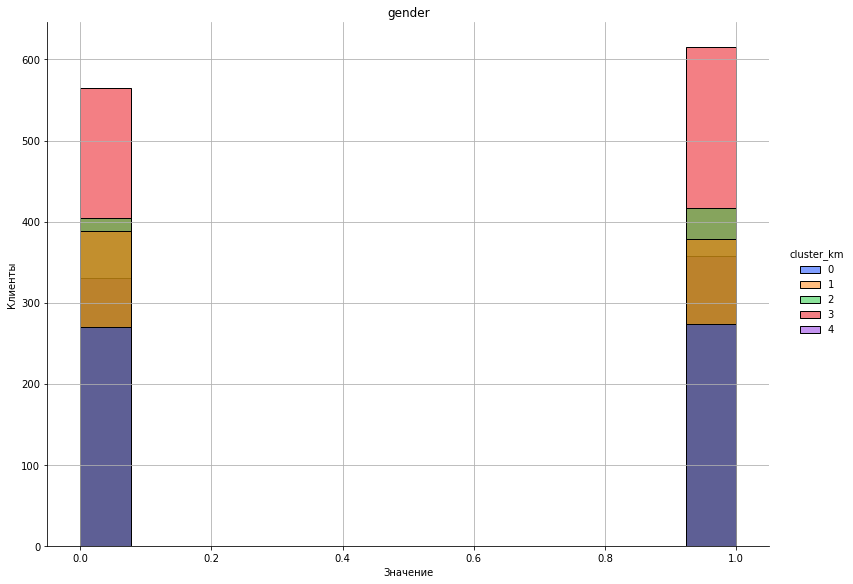

<Figure size 1080x720 with 0 Axes>

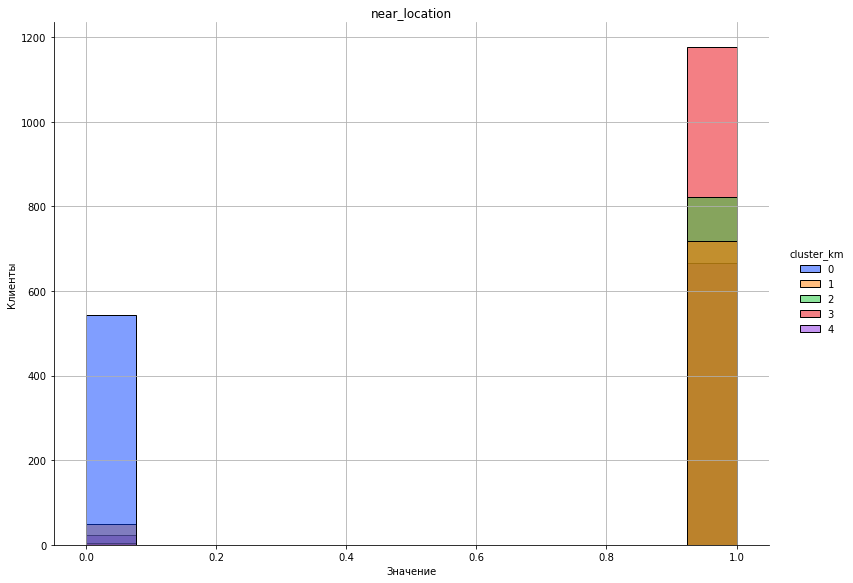

<Figure size 1080x720 with 0 Axes>

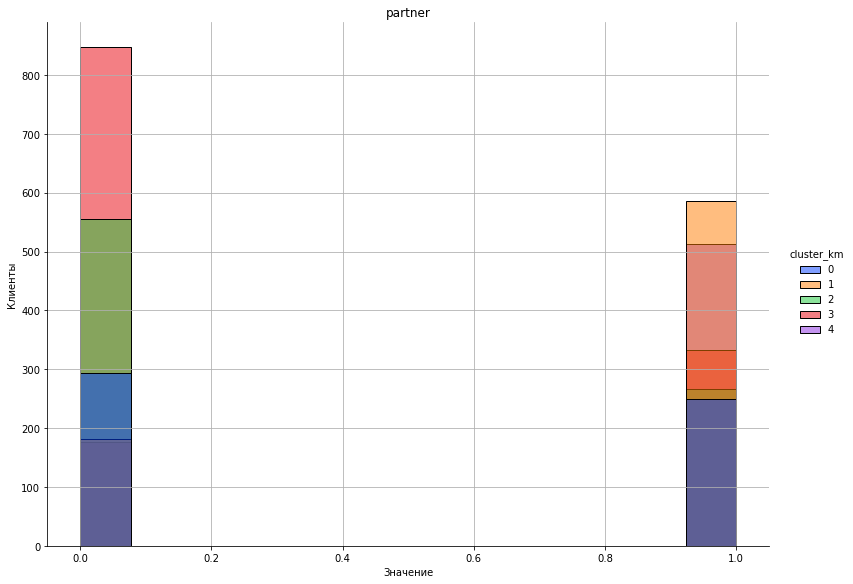

<Figure size 1080x720 with 0 Axes>

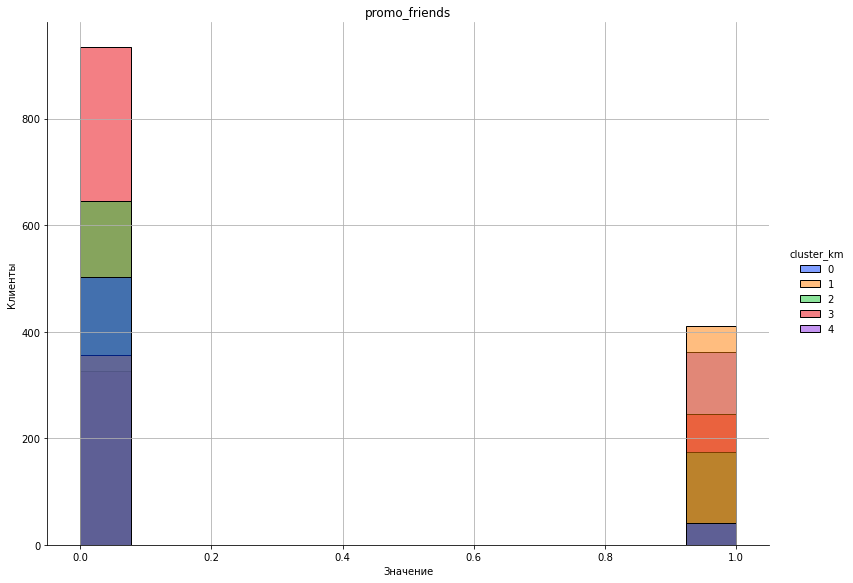

<Figure size 1080x720 with 0 Axes>

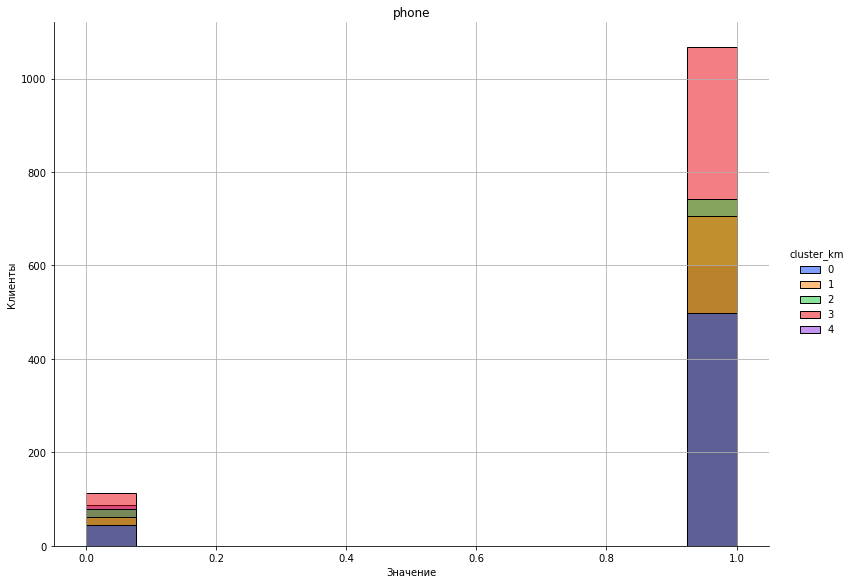

<Figure size 1080x720 with 0 Axes>

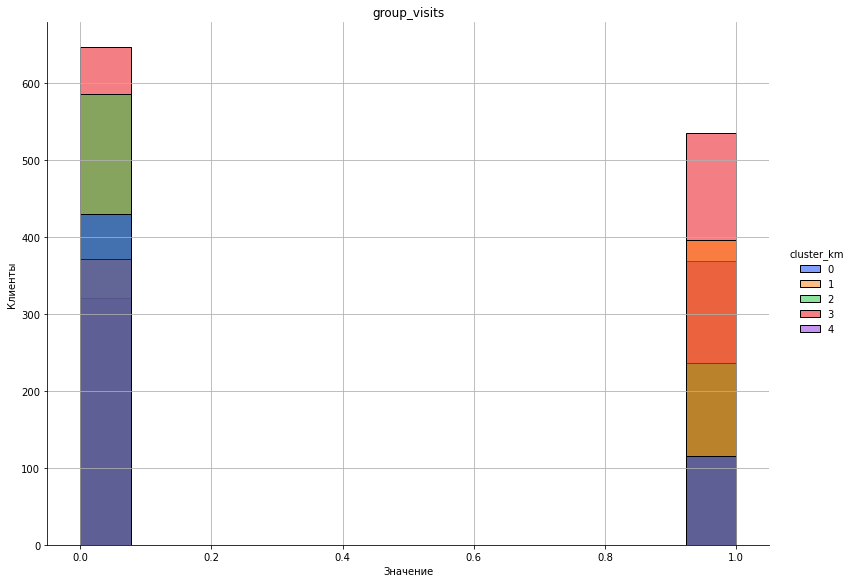

In [46]:
# Чтобы упростить работу, пройдемся циклом по числовым столбцам и построим график 
for column in df_category:
    plt.figure(figsize=(15, 10))
    sns.displot(data=df, x=column, hue='cluster_km', legend='cluster_km', palette='bright', height=8, aspect=11/8)
    plt.title(column)
    plt.ylabel('Клиенты')
    plt.xlabel('Значение')
    plt.grid(True)
    plt.show()

Вспомним выводы:
* В кластер 1 [По индексу 0] попали клиенты, которые не живут в районе нахождения фитнес-клуба, не ходят на групповые занятия и длительность текущего абонемента составляет не более двух месяцев;
* В кластер 2 попали клиенты с длительным сроком действующего абонемента, приносящих большУю суммарную выручку, которые часто ходят и имеют действующий абонемент;
* В кластер 3 попали клиенты, которые точно живут в районе фитнес-клуба, самые молодые, приносящие наименьшую прибыль, которые в большинстве к сожалению уже покинули клуб;
* В кластер 4 попали клиенты - не сотрудники компаний-партнеров, самые возрастные, но продолжающие оставаться в фитнес-клубе;
* В кластер 5 попали клиенты - в основном сотруднкик компаний-партнеров, с длительными абонементами, приносящие наибОльшую суммарную выручку 

##### Для каждого полученного кластера посчитаем долю оттока

Из начала работы вспомним, что `0` - это остался, а `1` - это ушел

In [47]:
# Делаем срез
df_1 = df.query('churn==1')

In [48]:
# Считаем долю ушедших методом `GroupBy.size()`
(df_1.groupby('cluster_km').size() / len(df_1))*100

cluster_km
0    23.091423
1     0.565504
2    74.363808
3     0.377003
4     1.602262
dtype: float64

По полученным значениям видим, что самое большое количество оттока клиентов - из кластера 3 [Индекс 2]. Это самые молодые клиенты, приносящие наименьшую прибыль. Также значительное число оттока клиентов - те клиенты, которые не живут в районе нахождения фитнес-клуба. Самые надежные - имеющие абонемент на длительное время и сотрудники компаний-партнеров

# Шаг 5. Формулирование выводов и базовые рекомендации по работе с клиентами:<a id="step6"></a>   
</div>

### Выводы:
1. В фитнес-клуб ходят клиенты обоих полов примерно одинаковое количество;
2. Возраст клиентов - от 18 до 41 года;
3. Клиенты, у которых абонементы на короткий срок, чаще уходят, чем клиенты, у которох абонемент на длительный срок;
4. Чаще всего остаются клиенты в возрасте 30 лет;
5. Срок абонемента в среднем до полугода;
6. Частота посещения занятий в среднем от 1 до 3 раз;
7. В фитнес-клуб ходят те, кто проживает в районе нахождения клуба. Чаще клуб покидают клиенты из другого района;
8. Много клиентов - сотрудники компаний-партнеров;
9. Акция "Приведи друга" не сильно влияет на приток клиентов.

### Рекомендации:
1. Увеличивать компании-партнеры, особенно которые находятся в районе нахождения фитнес-клуба (например, занести визитки в офисные компании);
2. Больше внимания уделять клиентам в возрасте 30 лет, предлагая им абонементы на длительный срок (возможно, снизить им цену на абонемент, т.к. в дальнейшем они могут еще и воспользоваться другими услугами фитнес-клуба);
3. Приглашать на групповые занятия людей с длительным сроком абонементов (чаще рекламируя и приглашая на открытые занятия).